# Importing Packages

In [1]:
# For Data Manipulation
import pandas as pd
import numpy as np

# For plotting
import matplotlib.pyplot as plt

# Metrics
from sklearn.metrics import mean_squared_error

# SARIMAX
from statsmodels.tsa.statespace.sarimax import SARIMAX

# ACF and PACF functions
import statsmodels.graphics.tsaplots as sgt

# Helper Functions

In [2]:
def plot_acf_pacf(series: pd.Series):
    """
    Plot ACF and PACF functions
    
    INPUTS:
        :series (pd.Sereies): Input Time series.
    
    OUTPUTS:
        :(None): No output returned
    """
    fig, ax = plt.subplots(1, 2, figsize=(20, 5))
    sgt.plot_acf(series, lags=40, ax=ax[0])
    sgt.plot_pacf(series, lags=40, ax=ax[1], method='ywm')
    plt.show()

In [3]:
def arima_modeling(df: pd.DataFrame, company_name: str):
    """
    Produces an ARIMA fit for the input dataframe
    
    INPUTS:
        :df (pd.DataFrame): Input dataframe.
        :company_name (str): Company name
    """
    # Train test split
    train = df.loc[:"2021-10-29", :]
    test = df.loc["2021-10-29":, :]
    
    # Model
    y = train["Adj_Close"]
    X = train.iloc[:, 1:]
    model = SARIMAX(y, order=(1, 1, 1), seasonal_order=(1, 1, 1, 7), exog=X, freq="B")
    model_fit = model.fit()
    
    # Forecasts
    forecast = model_fit.get_forecast(len(test.index), exog=test.iloc[:, 1:])
    forecast_df = forecast.conf_int(alpha = 0.05)
    forecast_df["Adj_Close"] = (forecast_df["lower Adj_Close"] + forecast_df["upper Adj_Close"])/2

    # Forecast Evaluation
    test_mse = mean_squared_error(y_true=test["Adj_Close"].to_numpy(), y_pred=forecast_df["Adj_Close"].to_numpy())
    test_rmse = np.sqrt(test_mse)
    print(f"Test RMSE: {round(test_rmse, 4)}")
    print("-"*30, end="\n\n")

    # Plotting forecasts
    fig, ax = plt.subplots(figsize=(8, 5))
    ax.plot(test["Adj_Close"].to_numpy(), label="Actual values")
    ax.plot(forecast_df["Adj_Close"].to_numpy(), label="Test predictions")
    ax.set_xlabel("Time", size=12)
    ax.set_ylabel("Stock Price", size=12)
    ax.set_ylim([train["Adj_Close"].min()-10, test["Adj_Close"].max()+10])
    ax.set_title(f"{company_name}: Actuals vs ARIMA Predictions", size=15)
    ax.grid()
    ax.legend()
    plt.show()

# ARIMA for each company

## Facebook

/opt/anaconda3/envs/stock/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           21     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.86564D+00    |proj g|=  8.00689D-02

At iterate    5    f=  2.75589D+00    |proj g|=  3.50860D-02

At iterate   10    f=  2.74188D+00    |proj g|=  2.69059D-02

At iterate   15    f=  2.73451D+00    |proj g|=  8.09538D-03

At iterate   20    f=  2.73377D+00    |proj g|=  6.22759D-04

At iterate   25    f=  2.73374D+00    |proj g|=  9.94583D-04

At iterate   30    f=  2.73359D+00    |proj g|=  1.69534D-03

At iterate   35    f=  2.73357D+00    |proj g|=  4.21460D-04

At iterate   40    f=  2.73356D+00    |proj g|=  5.25560D-04

At iterate   45    f=  2.73348D+00    |proj g|=  2.14230D-03

At iterate   50    f=  2.73345D+00    |proj g|=  5.02551D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/opt/anaconda3/envs/stock/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Test RMSE: 13.2504
------------------------------



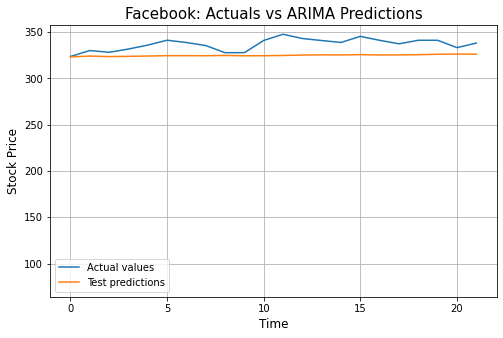

In [4]:
df = pd.read_csv("../Data/fb_sentiment_df.csv")
df.set_index(["Date"], inplace=True)
arima_modeling(df = df, company_name = "Facebook")

## Apple

/opt/anaconda3/envs/stock/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           21     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.87889D+00    |proj g|=  7.88172D-02

At iterate    5    f=  2.76903D+00    |proj g|=  1.84278D-02

At iterate   10    f=  2.75259D+00    |proj g|=  8.57884D-03

At iterate   15    f=  2.75133D+00    |proj g|=  6.71704D-03

At iterate   20    f=  2.75096D+00    |proj g|=  1.14487D-03

At iterate   25    f=  2.75086D+00    |proj g|=  2.30562D-04

At iterate   30    f=  2.75073D+00    |proj g|=  1.68244D-03

At iterate   35    f=  2.75071D+00    |proj g|=  5.82004D-04

At iterate   40    f=  2.75062D+00    |proj g|=  1.54734D-03

At iterate   45    f=  2.75058D+00    |proj g|=  9.29479D-05


/opt/anaconda3/envs/stock/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  2.75058D+00    |proj g|=  2.36014D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   21     50     58      1     0     0   2.360D-04   2.751D+00
  F =   2.7505785671444913     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
Test RMSE: 13.0928
------------------------------



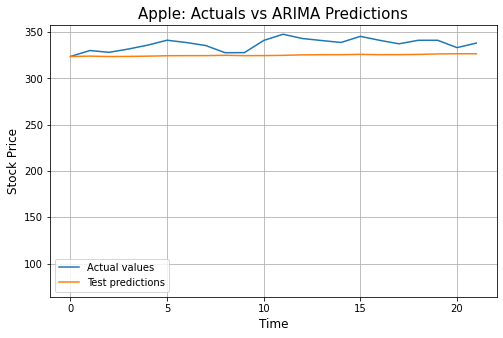

In [5]:
df = pd.read_csv("../Data/aapl_sentiment_df.csv")
df.set_index(["Date"], inplace=True)
arima_modeling(df = df, company_name = "Apple")

## Amazon

/opt/anaconda3/envs/stock/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           21     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.88342D+00    |proj g|=  7.82615D-02

At iterate    5    f=  2.77453D+00    |proj g|=  3.91763D-02

At iterate   10    f=  2.76008D+00    |proj g|=  2.99055D-02

At iterate   15    f=  2.75242D+00    |proj g|=  1.23682D-02

At iterate   20    f=  2.75182D+00    |proj g|=  1.02981D-03

At iterate   25    f=  2.75181D+00    |proj g|=  1.96850D-04

At iterate   30    f=  2.75163D+00    |proj g|=  4.13484D-03

At iterate   35    f=  2.75081D+00    |proj g|=  5.78573D-03

At iterate   40    f=  2.75060D+00    |proj g|=  9.27326D-04

At iterate   45    f=  2.75060D+00    |proj g|=  1.49316D-04

At iterate   50    f=  2.75055D+00    |proj g|=  7.13770D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/opt/anaconda3/envs/stock/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Test RMSE: 12.6247
------------------------------



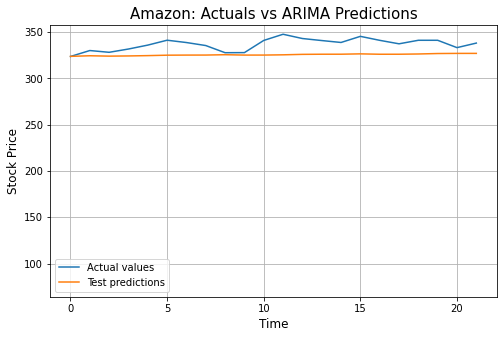

In [6]:
df = pd.read_csv("../Data/amzn_sentiment_df.csv")
df.set_index(["Date"], inplace=True)
arima_modeling(df = df, company_name = "Amazon")

## Netflix

/opt/anaconda3/envs/stock/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           21     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.88614D+00    |proj g|=  7.85251D-02

At iterate    5    f=  2.77737D+00    |proj g|=  2.92682D-02

At iterate   10    f=  2.76268D+00    |proj g|=  2.72607D-02

At iterate   15    f=  2.75619D+00    |proj g|=  3.03752D-03

At iterate   20    f=  2.75507D+00    |proj g|=  2.53466D-03

At iterate   25    f=  2.75504D+00    |proj g|=  4.08104D-04

At iterate   30    f=  2.75504D+00    |proj g|=  5.05945D-04

At iterate   35    f=  2.75501D+00    |proj g|=  5.18602D-04

At iterate   40    f=  2.75501D+00    |proj g|=  9.11987D-05

At iterate   45    f=  2.75501D+00    |proj g|=  4.97265D-04


/opt/anaconda3/envs/stock/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  2.75498D+00    |proj g|=  2.21160D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   21     50     55      1     0     0   2.212D-04   2.755D+00
  F =   2.7549838938269429     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
Test RMSE: 12.7959
------------------------------



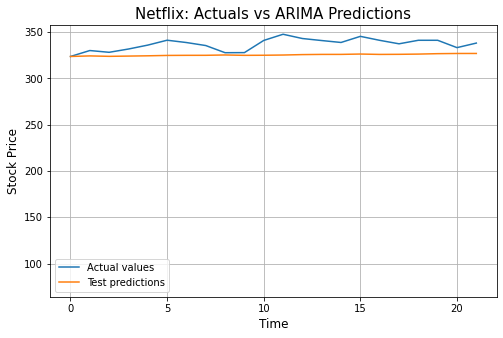

In [7]:
df = pd.read_csv("../Data/nflx_sentiment_df.csv")
df.set_index(["Date"], inplace=True)
arima_modeling(df = df, company_name = "Netflix")

## Google

/opt/anaconda3/envs/stock/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/envs/stock/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/anaconda3/envs/stock/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           21     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.87368D+00    |proj g|=  7.89518D-02

At iterate    5    f=  2.76736D+00    |proj g|=  2.07928D-02

At iterate   10    f=  2.75120D+00    |proj g|=  2.25013D-02

At iterate   15    f=  2.74483D+00    |proj g|=  2.63499D-03

At iterate   20    f=  2.74373D+00    |proj g|=  2.46864D-03

At iterate   25    f=  2.74358D+00    |proj g|=  4.20916D-04

At iterate   30    f=  2.74357D+00    |proj g|=  4.57018D-04

At iterate   35    f=  2.74355D+00    |proj g|=  1.71349D-03

At iterate   40    f=  2.74319D+00    |proj g|=  2.29900D-03

At iterate   45    f=  2.74313D+00    |proj g|=  1.98895D-04


/opt/anaconda3/envs/stock/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  2.74312D+00    |proj g|=  7.50860D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   21     50     55      1     0     0   7.509D-04   2.743D+00
  F =   2.7431226826123574     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
Test RMSE: 13.1479
------------------------------



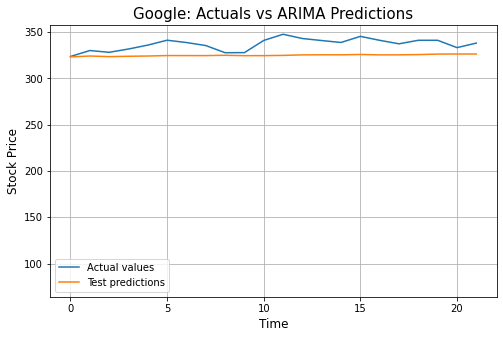

In [8]:
df = pd.read_csv("../Data/goog_sentiment_df.csv")
df.set_index(["Date"], inplace=True)
arima_modeling(df = df, company_name = "Google")